(3, 38, 98)
(3, 38, 98)
[ 1.46925157 -1.29399156]
[-0.0715723  -0.07152744 -0.06704153 -0.06229474 -0.05731827 -0.05215115
 -0.04692141 -0.04169072 -0.03650874 -0.03143631 -0.02655407 -0.02190946
 -0.01750687 -0.01347613 -0.00982187 -0.00661739 -0.00386102 -0.00163475
  0.          0.00099463  0.00205597  0.00379204  0.00621517  0.00931366
  0.01314076  0.0176591   0.02284651  0.02871627  0.03528336  0.04247052
  0.0503574   0.05881249  0.06791765  0.07758154  0.08785052  0.09866668
  0.10996054  0.12180333]
[ 1.49532367 -1.39853962]


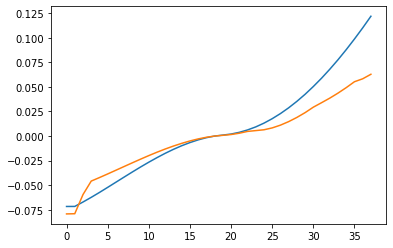

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.special import rel_entr
import pickle
from mpl_toolkits.mplot3d import axes3d
from scipy.ndimage.filters import gaussian_filter



ny = 36
nx = 96
convmesh = np.load("./conv_geo_mesh_center.npy")
convmesh_x = np.load("./conv_geo_mesh_x.npy")
convmesh_y = np.load("./conv_geo_mesh_y.npy")

almesh = np.load("./al_geo_mesh_center.npy")
almesh_x = np.load("./al_geo_mesh_x.npy")
almesh_y = np.load("./al_geo_mesh_y.npy")
co_facing = np.load("./gs_b2fgmtry.npy")
al_facing = np.load("./gs_b2fgmtry_al.npy")
print(np.shape(co_facing))
print(np.shape(al_facing))
def conv_distance_center(first_point, second_point):
    x_range = x_convmeshinfo[first_point[1],first_point[0]]-x_convmeshinfo[second_point[1],second_point[0]]
    y_range = y_convmeshinfo[first_point[1],first_point[0]]-y_convmeshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def conv_distance_point(first_point, second_point):
    x_range = convmesh_x[first_point[2],first_point[1],first_point[0]]-convmesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = convmesh_y[first_point[2],first_point[1],first_point[0]]-convmesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_center(first_point, second_point):
    x_range = x_almeshinfo[first_point[1],first_point[0]]-x_almeshinfo[second_point[1],second_point[0]]
    y_range = y_almeshinfo[first_point[1],first_point[0]]-y_almeshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_point(first_point, second_point):
    x_range = almesh_x[first_point[2],first_point[1],first_point[0]]-almesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = almesh_y[first_point[2],first_point[1],first_point[0]]-almesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

dumx_convmeshinfo = convmesh[:,0]
dumy_convmeshinfo = convmesh[:,1]
x_convmeshinfo = dumx_convmeshinfo.reshape(ny+2,nx+2)
y_convmeshinfo = dumy_convmeshinfo.reshape(ny+2,nx+2)

dumx_almeshinfo = almesh[:,0]
dumy_almeshinfo = almesh[:,1]
x_almeshinfo = dumx_almeshinfo.reshape(ny+2,nx+2)
y_almeshinfo = dumy_almeshinfo.reshape(ny+2,nx+2)



#po_dumx_meshinfo = convmesh[:,0]
#po_dumy_meshinfo = convmesh[:,1]
#po_x_meshinfo = dumx_meshinfo.reshape(4,ny+2,nx+2)
#po_y_meshinfo = dumy_meshinfo.reshape(4,ny+2,nx+2)

conv_sep_out_target = np.zeros(2)
conv_sep_out_target[0] = convmesh_x[1,18,96]
conv_sep_out_target[1] = convmesh_y[1,18,96]

al_sep_out_target = np.zeros(2)
al_sep_out_target[0] = almesh_x[1,18,96]
al_sep_out_target[1] = almesh_y[1,18,96]
convmesh_x_cen = np.sum(convmesh_x, axis = 0)/4
convmesh_y_cen = np.sum(convmesh_y, axis = 0)/4
almesh_x_cen = np.sum(almesh_x, axis = 0)/4
almesh_y_cen = np.sum(almesh_y, axis = 0)/4
print(conv_sep_out_target)
conv_sep_out_target_dist = np.zeros(ny+2)
for i in range(ny+2):
    conv_sep_out_target_dist[i] = conv_distance_point([96,i,1],[96,18,1])
    if i<18:
        conv_sep_out_target_dist[i] = -conv_sep_out_target_dist[i]
    
conv_sep_in_target_dist = np.zeros(ny+2)
for i in range(ny+2):
    conv_sep_in_target_dist[i] = conv_distance_point([1,i,1],[1,18,1])
    if i<18:
        conv_sep_in_target_dist[i] = -conv_sep_in_target_dist[i]
print(conv_sep_out_target_dist)

print(al_sep_out_target)
al_sep_out_target_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_out_target_dist[i] = al_distance_point([96,i,1],[96,18,1])
    if i<18:
        al_sep_out_target_dist[i] = -al_sep_out_target_dist[i]
    
al_sep_in_target_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_in_target_dist[i] = al_distance_point([1,i,1],[1,18,1])
    if i<18:
        al_sep_in_target_dist[i] = -al_sep_in_target_dist[i]


        
        
conv_sep_out_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    conv_sep_out_midplane_dist[i] = conv_distance_point([51,i,1],[51,18,1])
    if i<18:
        conv_sep_out_midplane_dist[i] = -conv_sep_out_midplane_dist[i]
    
conv_sep_in_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    conv_sep_in_midplane_dist[i] = conv_distance_point([29,i,1],[29,18,1])
    if i<18:
        conv_sep_in_midplane_dist[i] = -conv_sep_in_midplane_dist[i]


al_sep_out_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_out_midplane_dist[i] = al_distance_point([52,i,1],[52,18,1])
    if i<18:
        al_sep_out_midplane_dist[i] = -al_sep_out_midplane_dist[i]
    
al_sep_in_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_in_target_dist[i] = al_distance_point([29,i,1],[29,18,1])
    if i<18:
        al_sep_in_midplane_dist[i] = -al_sep_in_midplane_dist[i]
        
        
        
        
plt.plot(conv_sep_out_target_dist)
plt.plot(al_sep_out_target_dist)

In [69]:
fname_or = "fht_b2fstate_conv_KSTAR_check"



fname = "./%s.txt" %fname_or





#def find_ni(fname):
#    with open(fname) as f:
#        line = f.readlines()
#        print(line)
#    return line
    
with open(fname,'r') as f:
    line = f.readlines()
a=type(line)
k = len(line)
data_array = np.array(line)
full_length = np.size(data_array)
k1 = np.zeros(k)

    
    
raw_data = np.empty((full_length,4))




for i in range(0, full_length):
    dum = line[i].split()
    dum2 = len(dum)
    
    for j in range(4):
        if j+1<=len(dum):

            dum3 = dum[j]
            
            try:
                raw_data[i,j] = dum3
            except ValueError as m:
                raw_data[i,j] = 0
            #print(dum3)
        elif j+1>len(dum):
            continue
k=0            
print(np.shape(raw_data))
print(raw_data)
total_flux = np.empty((38))
for i in range(0,full_length):
    if raw_data[i,0]==95:
        print(raw_data[i,:])
        total_flux[k] = raw_data[i,3]
        k=k+1



(3725, 4)
[[  0.           0.           0.           0.        ]
 [ -1.          -1.           0.           7.49948754]
 [  0.          -1.           0.          -4.74413165]
 ...
 [ 94.          36.           0.         120.50695282]
 [ 95.          36.           0.          66.11112204]
 [ 96.          36.           0.           6.37045578]]
[95.         -1.          0.         13.36714708]
[   95.            0.            0.        16752.0054021]
[9.5000000e+01 1.0000000e+00 0.0000000e+00 2.2013042e+04]
[9.50000000e+01 2.00000000e+00 0.00000000e+00 2.59768533e+04]
[9.50000000e+01 3.00000000e+00 0.00000000e+00 2.90820744e+04]
[9.50000000e+01 4.00000000e+00 0.00000000e+00 3.13674336e+04]
[9.5000000e+01 5.0000000e+00 0.0000000e+00 3.3115727e+04]
[9.50000000e+01 6.00000000e+00 0.00000000e+00 3.44513559e+04]
[9.50000000e+01 7.00000000e+00 0.00000000e+00 3.53164251e+04]
[9.50000000e+01 8.00000000e+00 0.00000000e+00 3.58386122e+04]
[9.50000000e+01 9.00000000e+00 0.00000000e+00 3.55044353e+

In [70]:
print(total_flux)

[1.33671471e+01 1.67520054e+04 2.20130420e+04 2.59768533e+04
 2.90820744e+04 3.13674336e+04 3.31157270e+04 3.44513559e+04
 3.53164251e+04 3.58386122e+04 3.55044353e+04 3.48114265e+04
 3.32396121e+04 3.12988159e+04 2.90010328e+04 2.54360337e+04
 2.13059700e+04 1.65159737e+04 1.04838707e+04 1.09490356e+04
 1.86708571e+04 2.68392207e+04 3.50736142e+04 4.37458180e+04
 5.22965113e+04 6.09315157e+04 6.94053699e+04 7.86652408e+04
 8.74113666e+04 9.71858972e+04 1.06627007e+05 1.16740538e+05
 1.25349056e+05 1.34247561e+05 1.44287517e+05 1.51003333e+05
 1.34840456e+05 6.61111220e+01]


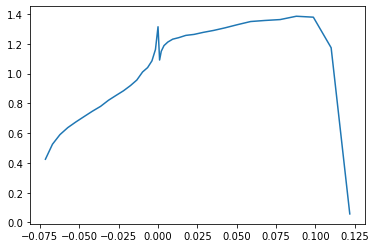

In [78]:
plt.plot(conv_sep_out_target_dist[1:], np.abs(total_flux[1:]/(co_facing[0,1:,96]*1000000)), label = "2.5 MW ")